<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(WMS12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the Excel file
file_path = "/content/Book2.xlsx"  # Change this to your file path
df = pd.read_excel(file_path)

In [ ]:
# Rename columns for consistency
df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
              "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
              "Ambient_Temperature", "Module_Temperature", "Rain",
              "Diffuse_Radiation", "Today_Rain"]

In [ ]:
# Convert Time_Stamp to datetime
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")

In [ ]:
# Convert numeric columns
numeric_columns = df.columns[1:]  # Exclude Time_Stamp
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [ ]:
# Drop missing values
df = df.dropna(subset=["Time_Stamp"])

In [ ]:
# Set Time_Stamp as index for resampling
df.set_index("Time_Stamp", inplace=True)

In [ ]:
# Resample data to hourly intervals (mean values per hour)
df_resampled = df.resample("H").mean()

<ipython-input-34-4ab7a98e3bcf>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


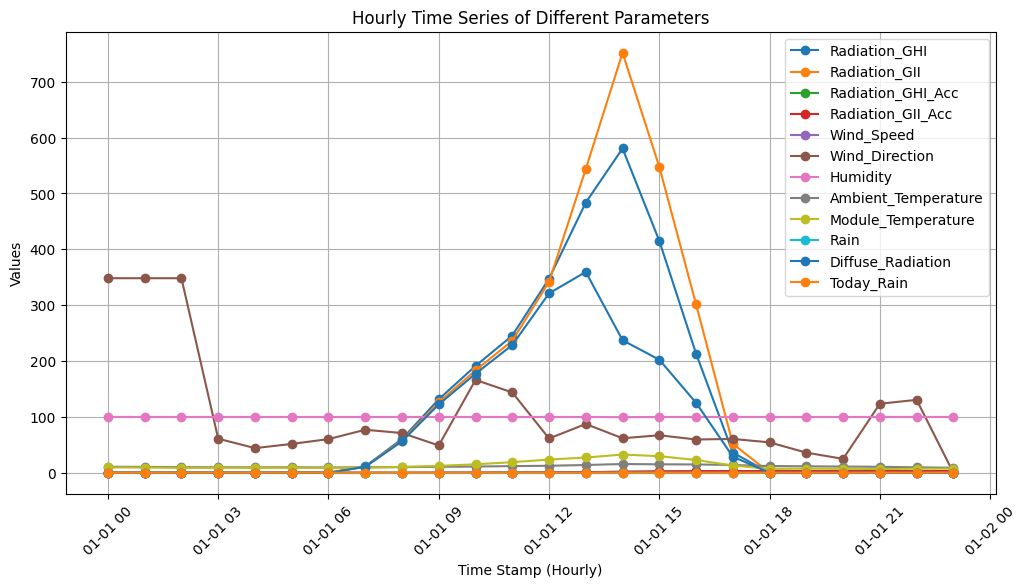

In [ ]:
# Plot each resampled column against Time_Stamp
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    plt.plot(df_resampled.index, df_resampled[col], label=col, marker='o', linestyle="-")

plt.xlabel("Time Stamp (Hourly)")
plt.ylabel("Values")
plt.title("Hourly Time Series of Different Parameters")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()